## Prediction of House Price using Linear, Ridge and Lasso Regression

### 1. EDA (Exploratory Data Analysis on House Data)

In [113]:
#importing libraries - 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [114]:
housingData=pd.read_csv("train.csv")
print(housingData.head())
housingData.info()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### A. Univariate Analysis

In [115]:
housingData['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [116]:
housingData['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [117]:
housingData['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [118]:
housingData['LotConfig'].astype('category').value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [119]:
housingData['Neighborhood'].astype('category').value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [120]:
housingData['BldgType'].astype('category').value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [121]:
housingData['HouseStyle'].astype('category').value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [122]:
housingData['OverallCond'].astype('category').value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [123]:
housingData['RoofStyle'].astype('category').value_counts()    

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [124]:
housingData['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [125]:
housingData['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [126]:
housingData['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [127]:
housingData['Heating'].astype('category').value_counts()   

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [128]:
housingData['CentralAir'].astype('category').value_counts()  

Y    1365
N      95
Name: CentralAir, dtype: int64

In [129]:
housingData['Electrical'].astype('category').value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [130]:
housingData['Functional'].astype('category').value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [131]:
#       MiscFeature: This attribute Identifies Miscellaneous feature not covered in other categories
#              
#       Elev   Elevator
#       Gar2   2nd Garage (if not described in garage section)
#       Othr   Other
#       Shed   Shed (over 100 SF)
#       TenC   Tennis Court
#       NA     None
housingData['MiscFeature'].astype('category').value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [132]:

#       Normal Normal Sale
#       Abnorml       Abnormal Sale -  trade, foreclosure, short sale
#       AdjLand       Adjoining Land Purchase
#       Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit 
#       Family Sale between family members
#       Partial       Home was not completed when last assessed (associated with New Homes)
housingData['SaleCondition'].astype('category').value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

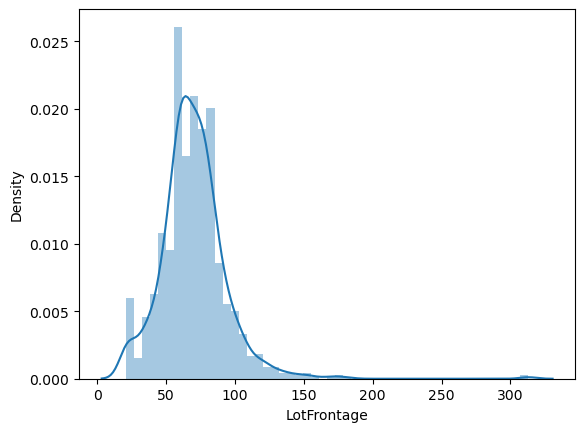

In [133]:
sns.distplot(housingData['LotFrontage'])
plt.show()

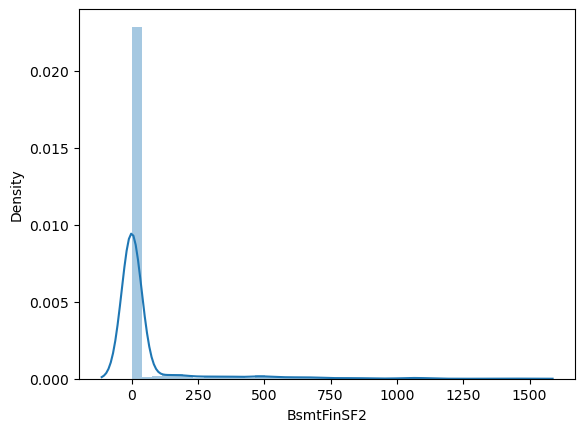

In [134]:
sns.distplot(housingData['BsmtFinSF2'])
plt.show()

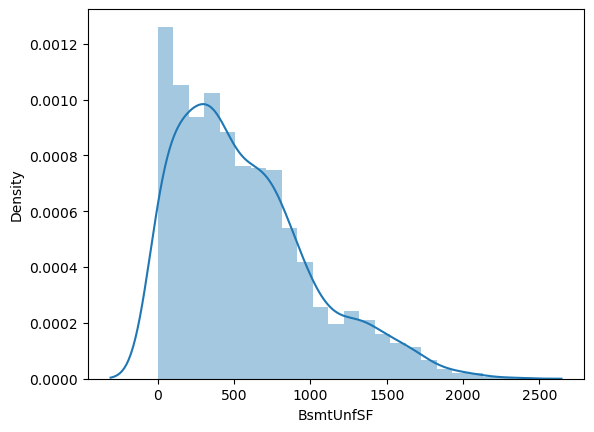

In [135]:
#BsmtUnfSF: This attribute Identifies Unfinished square feet of basement area
sns.distplot(housingData['BsmtUnfSF'])
plt.show()

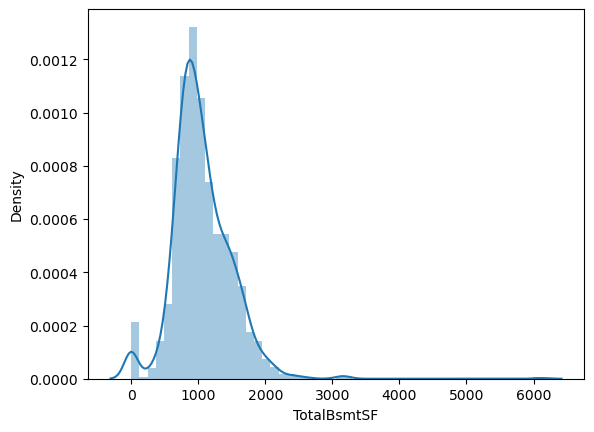

In [136]:
#TotalBsmtSF: This attribute Identifies Total square feet of basement area
sns.distplot(housingData['TotalBsmtSF'])
plt.show()

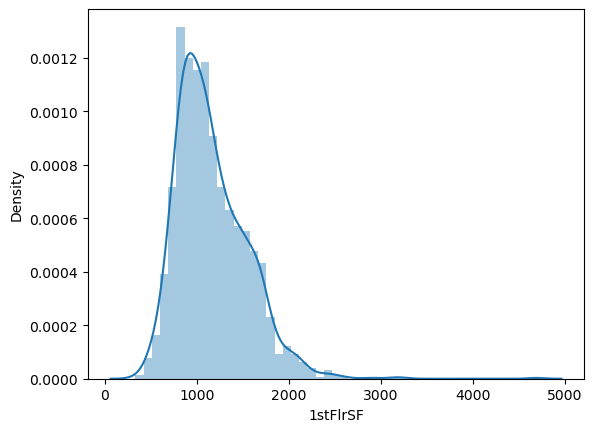

In [137]:
sns.distplot(housingData['1stFlrSF'])
plt.show()

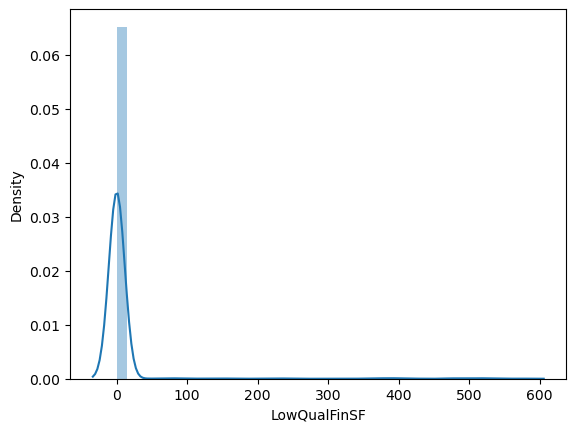

In [138]:
sns.distplot(housingData['LowQualFinSF'])
plt.show()

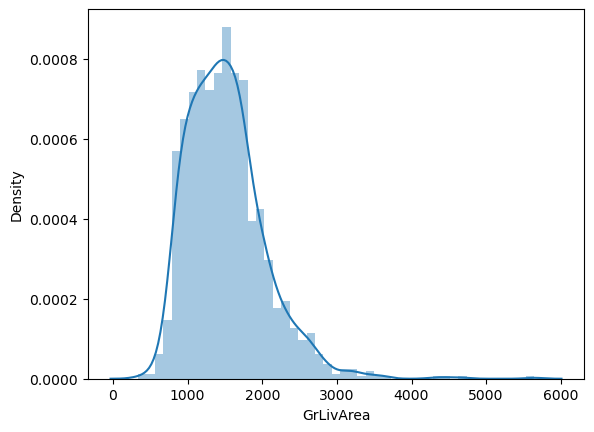

In [139]:
sns.distplot(housingData['GrLivArea'])
plt.show()

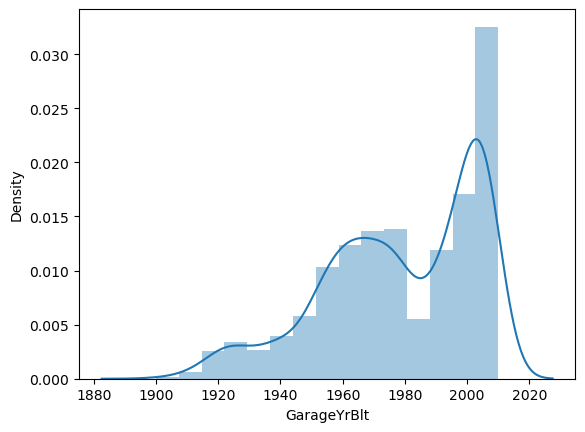

In [140]:
sns.distplot(housingData['GarageYrBlt'])
plt.show()

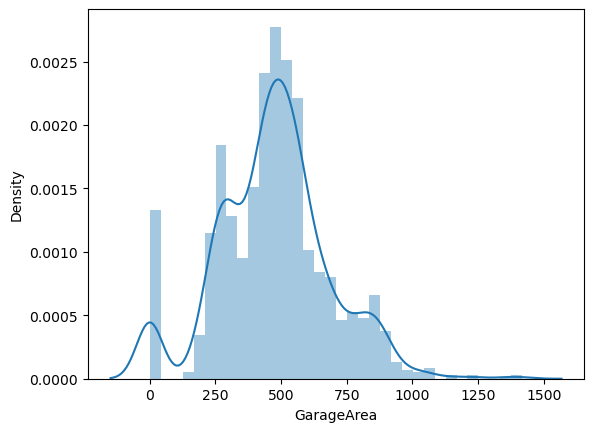

In [141]:
sns.distplot(housingData['GarageArea'])
plt.show()

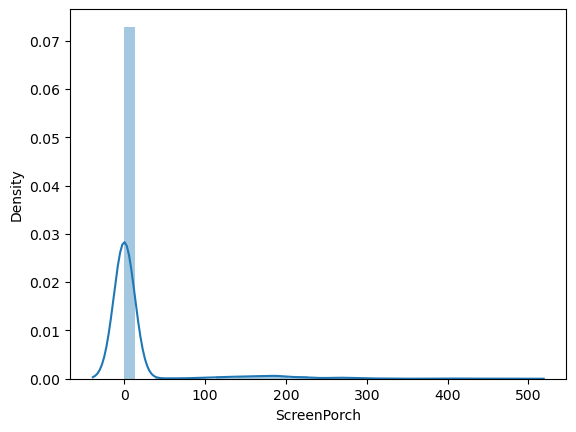

In [142]:
sns.distplot(housingData['ScreenPorch'])
plt.show()


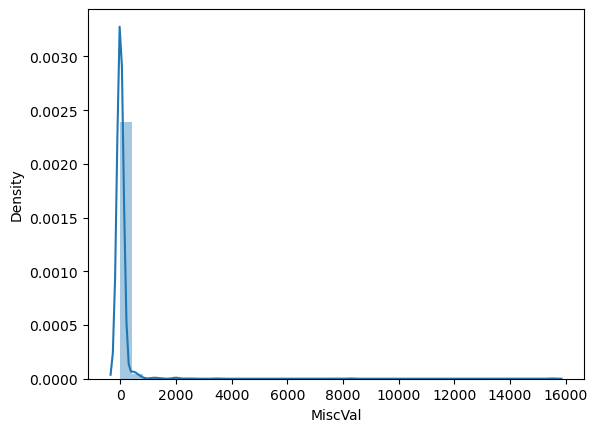

In [143]:
sns.distplot(housingData['MiscVal'])
plt.show()

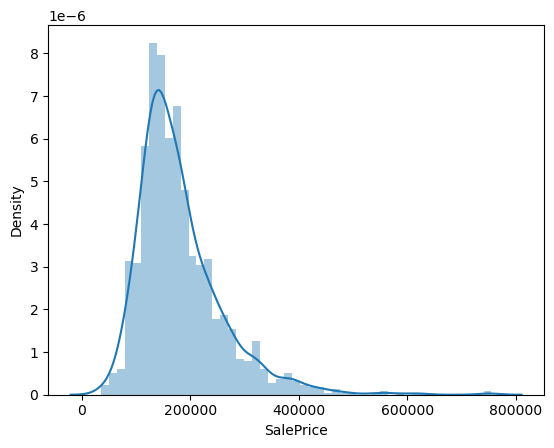

In [144]:
sns.distplot(housingData['SalePrice'])
plt.show()

### B. Bivariate Analysis 

In [145]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

housingDataNum = housingData.select_dtypes(include=numerics)
housingDataCategory = housingData.select_dtypes(exclude=numerics)
print(housingDataNum.columns)
print(housingDataCategory.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', '

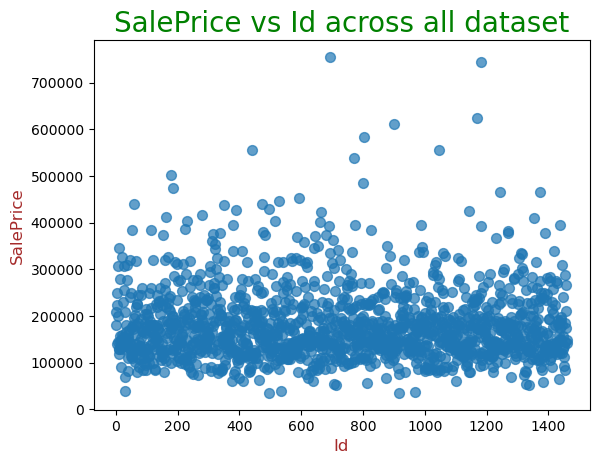

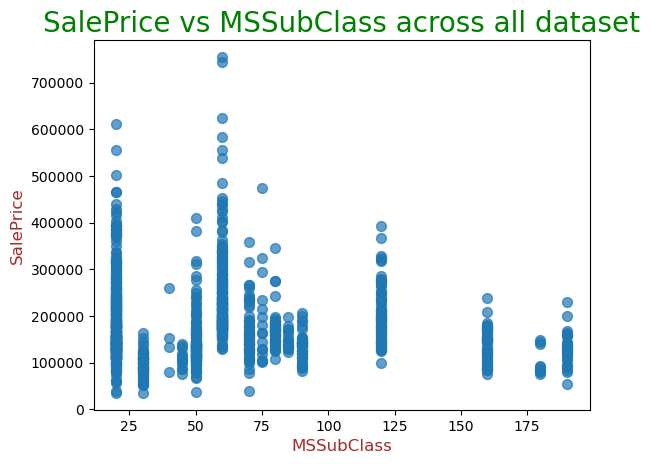

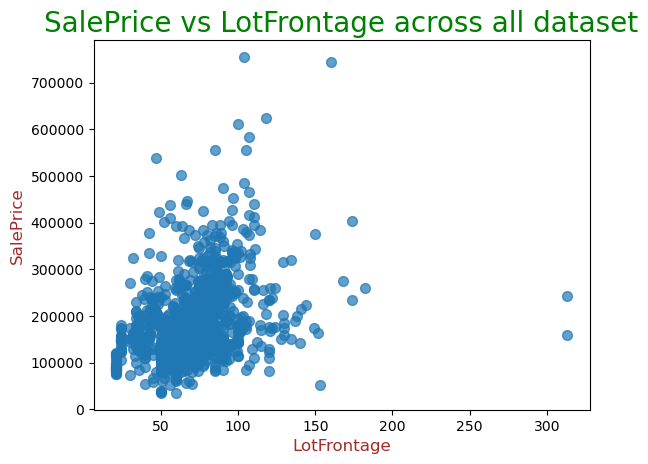

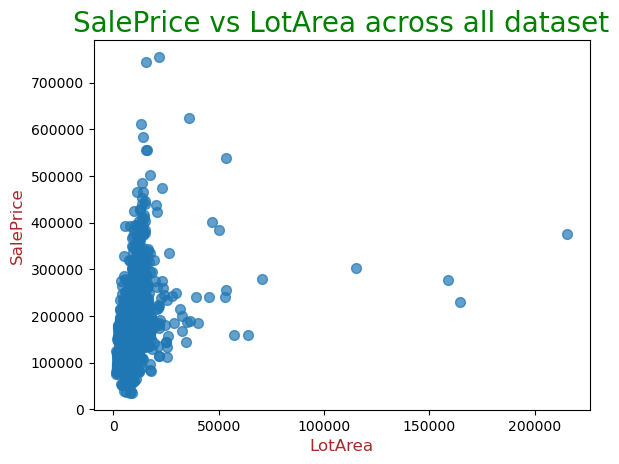

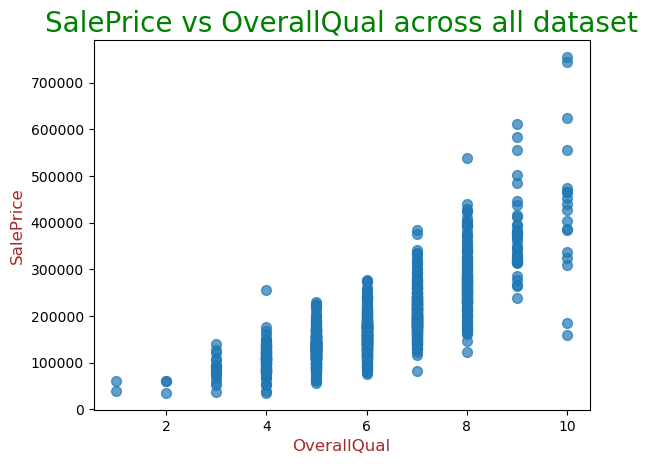

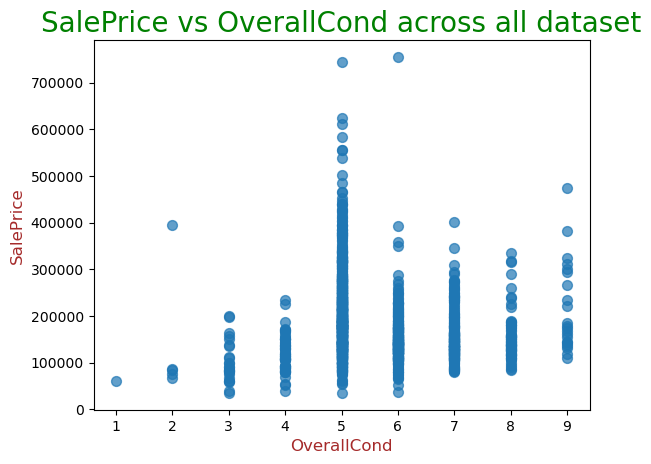

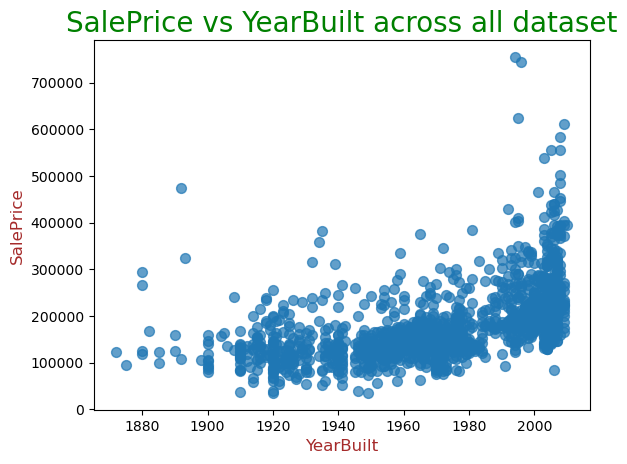

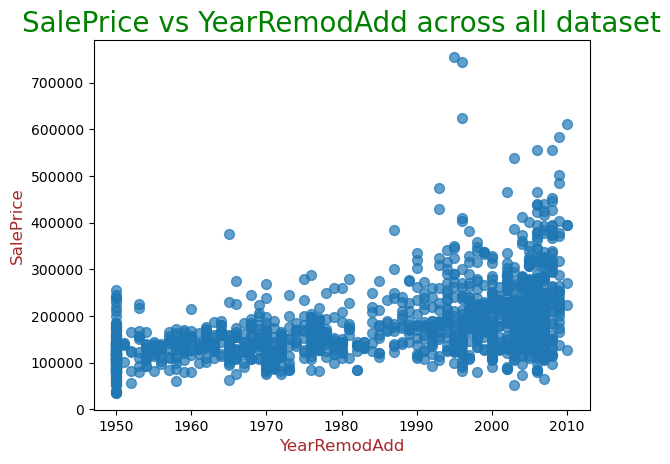

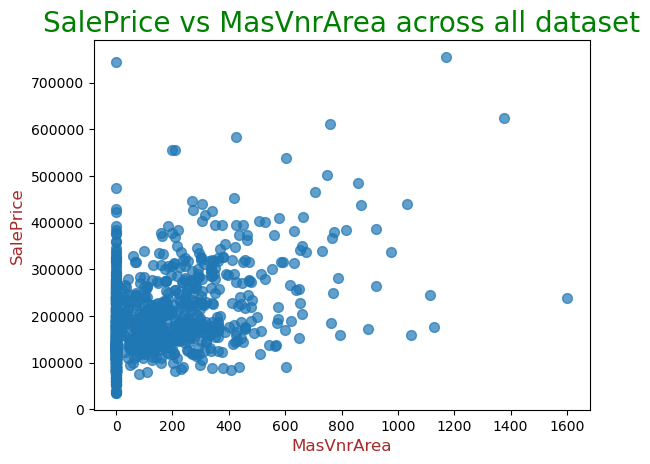

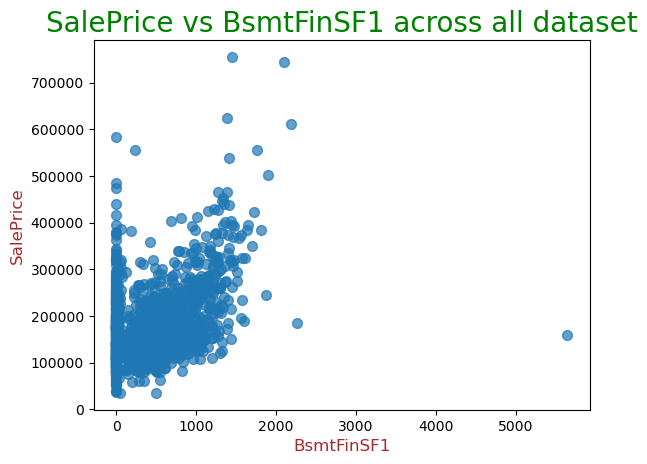

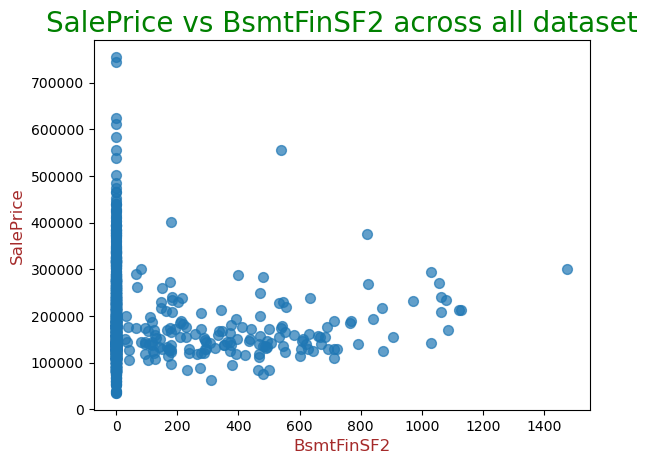

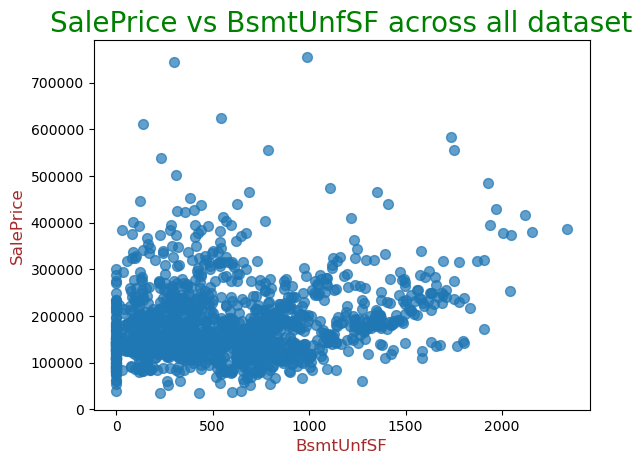

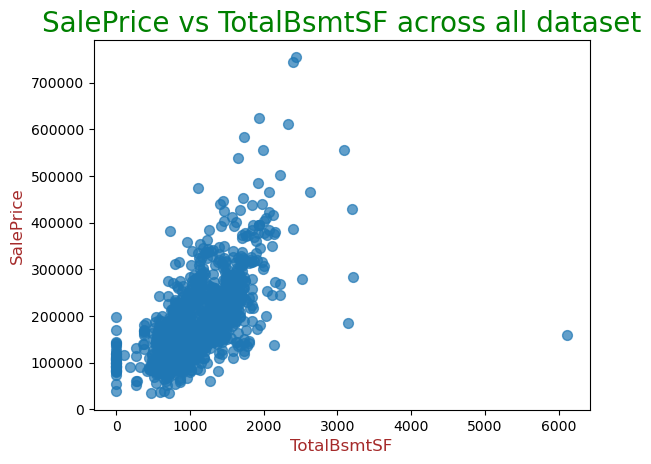

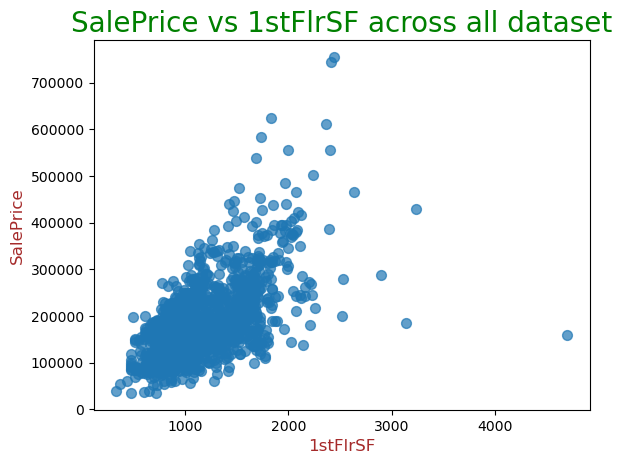

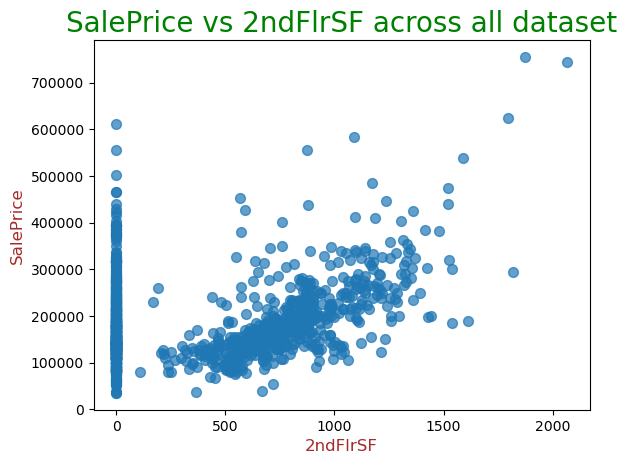

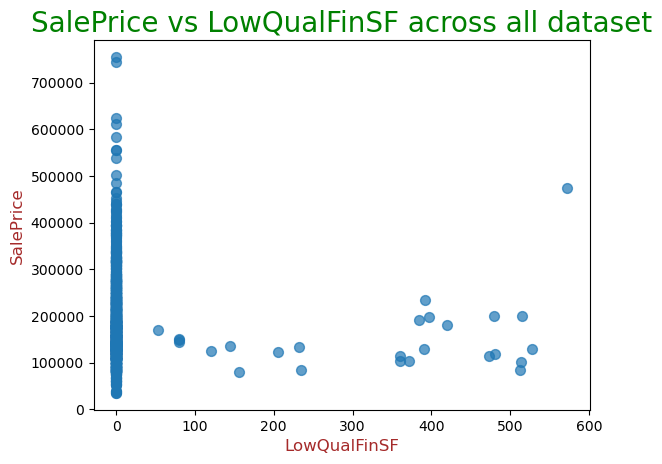

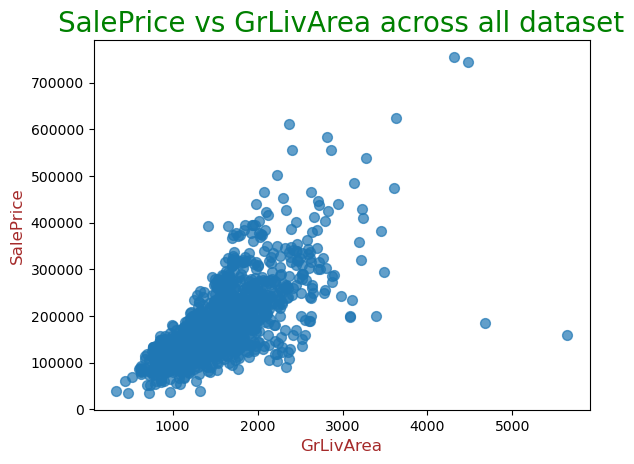

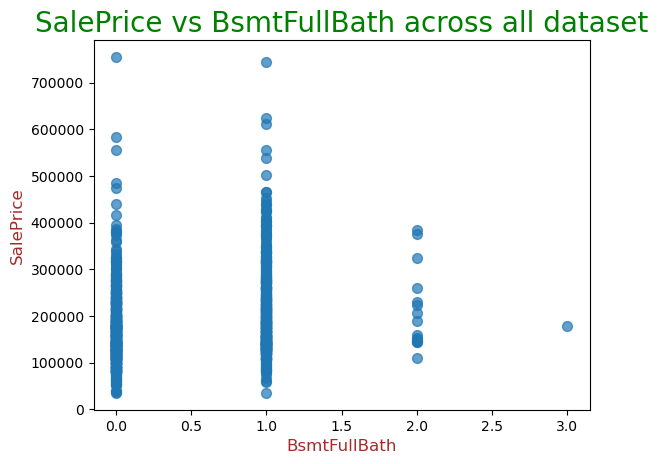

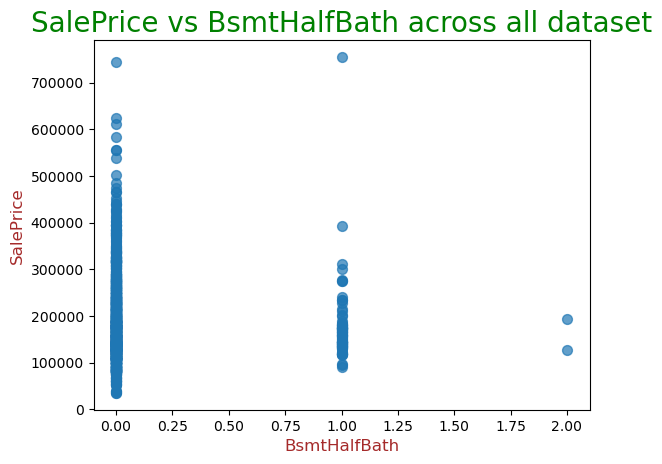

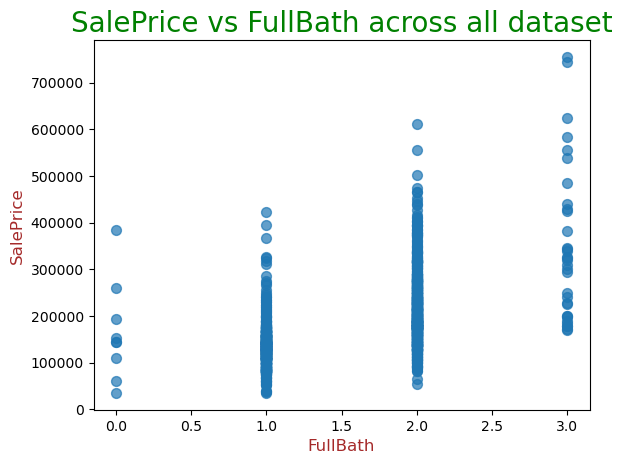

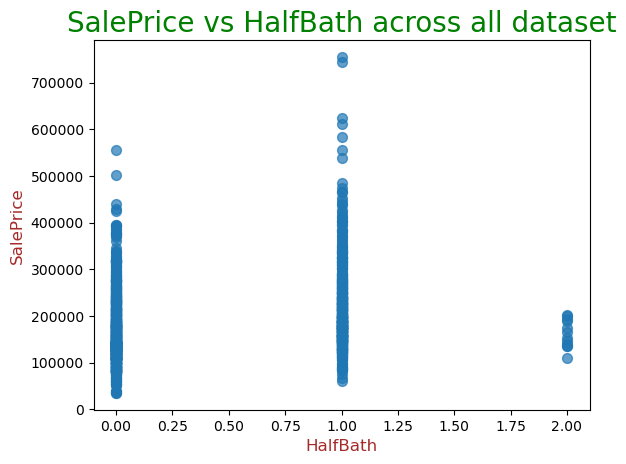

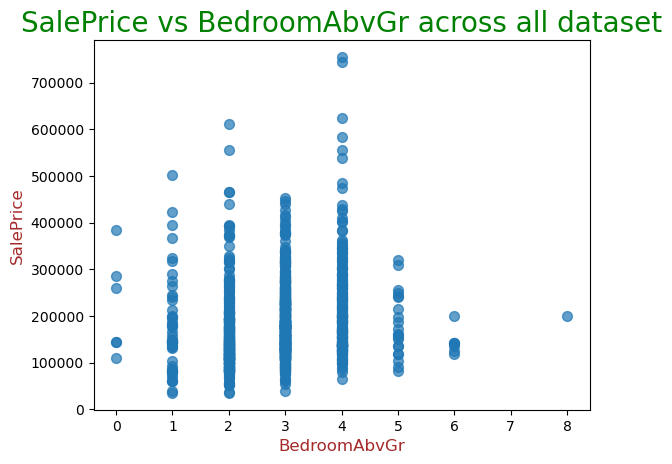

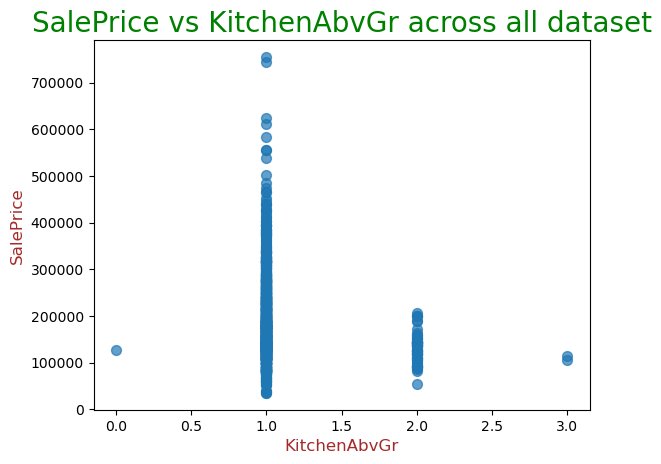

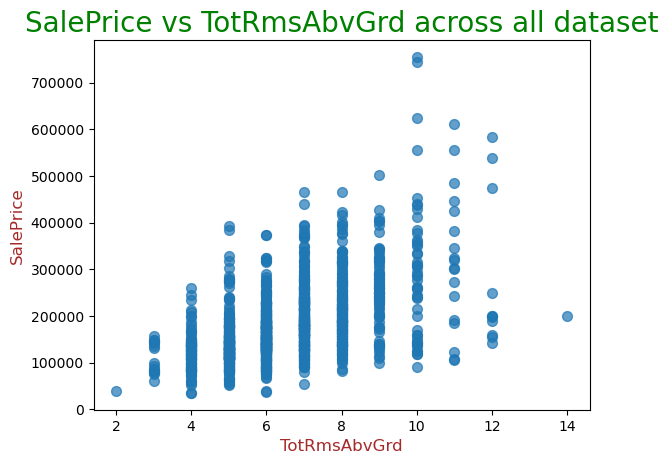

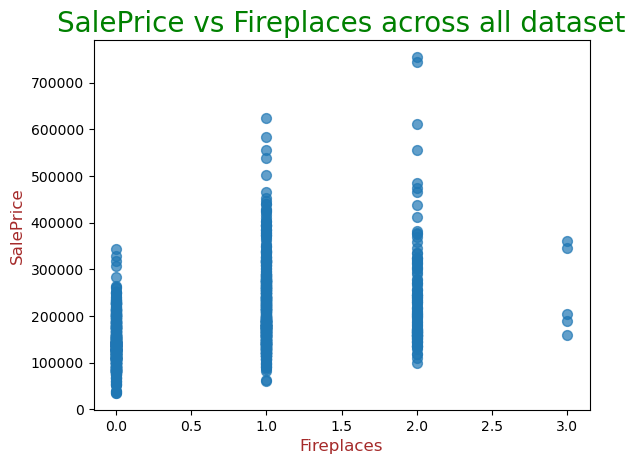

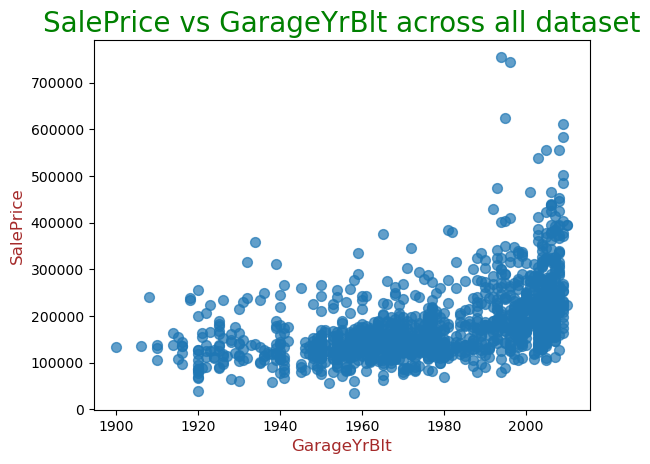

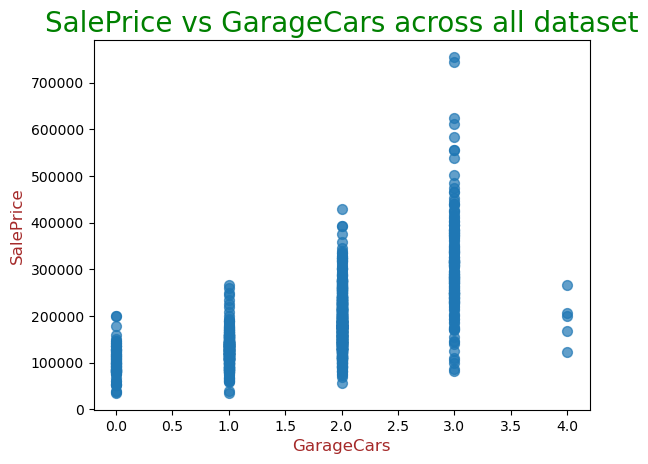

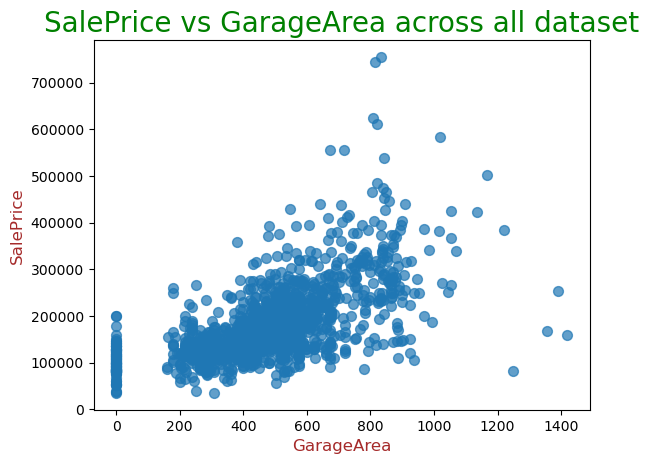

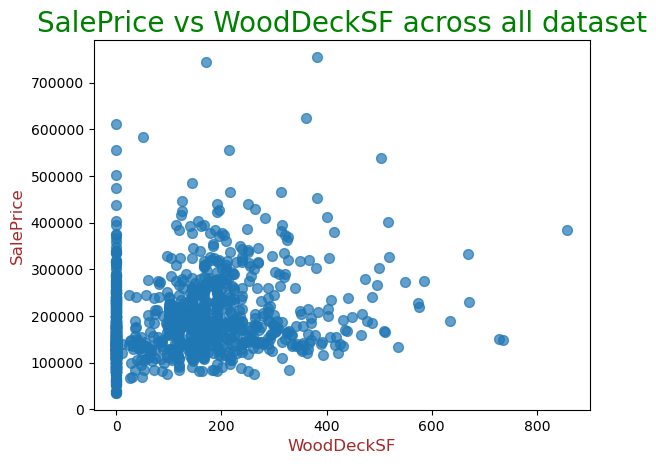

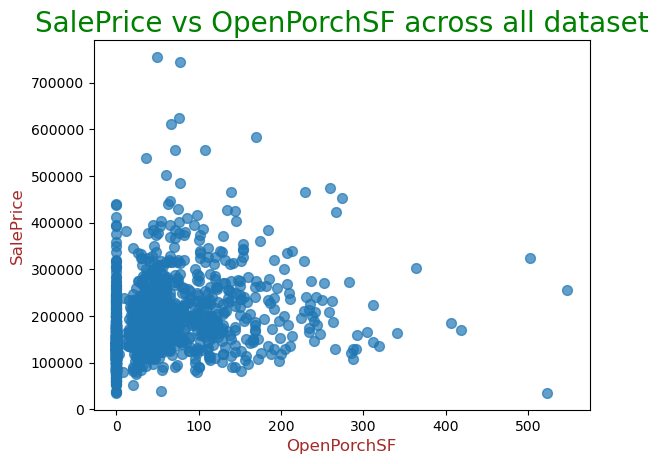

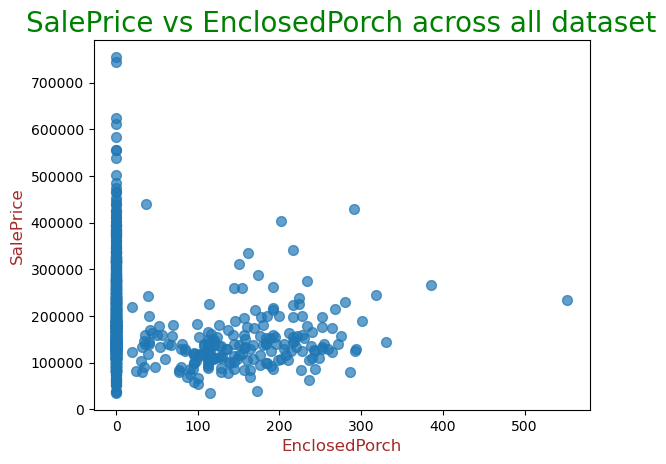

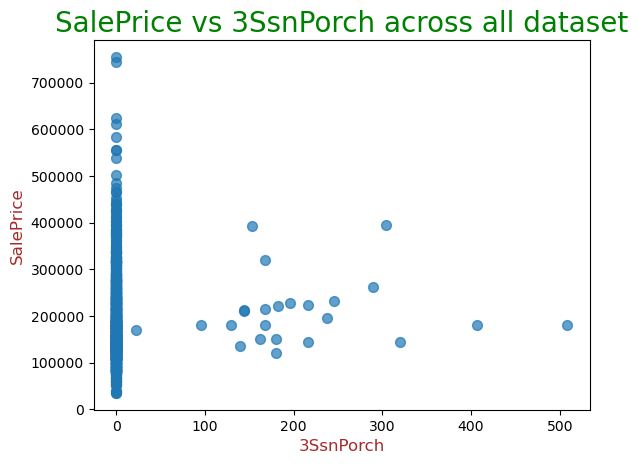

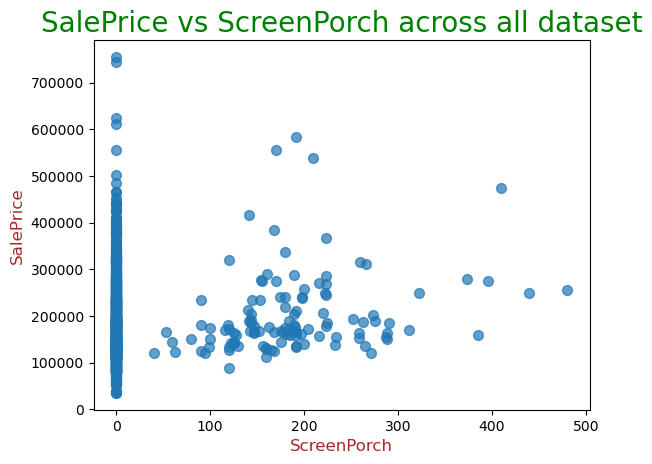

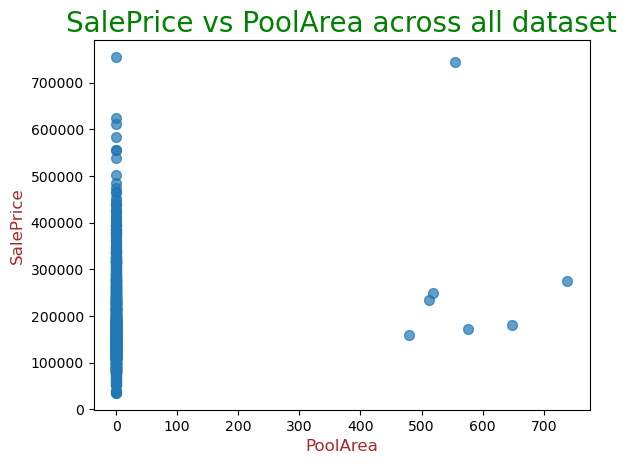

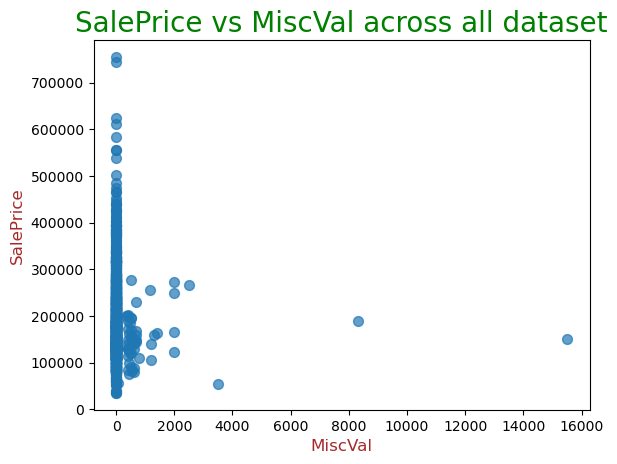

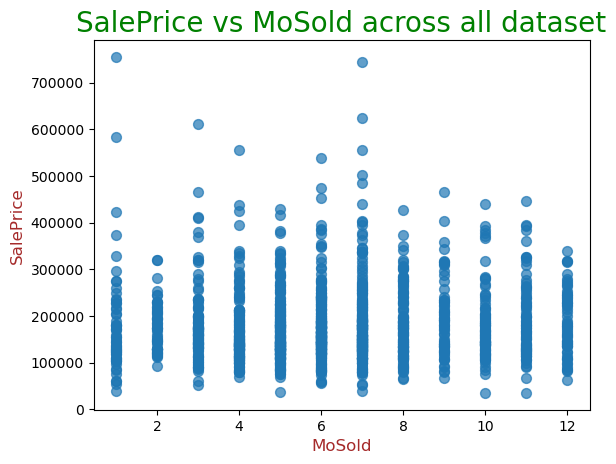

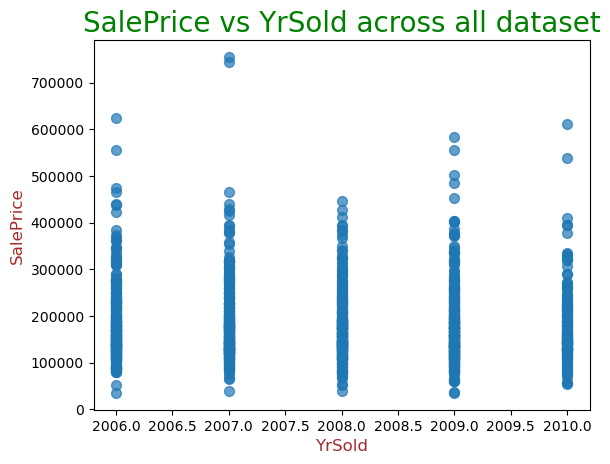

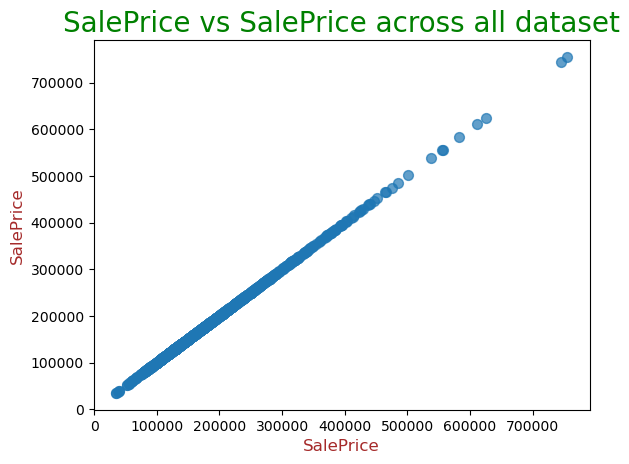

In [146]:
outputCol = 'SalePrice'
for col in housingDataNum.columns:
    plt.scatter(housingData[col], housingData[outputCol], alpha= 0.7, s = 50 )
    # Adding and formatting title
    plt.title("SalePrice vs "+ col+" across all dataset", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

    # Labeling Axes
    plt.xlabel(col, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("SalePrice", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

### C. Removing Unnecessary Columns 

In [147]:
unnecessaryColumns=['MasVnrArea','BsmtFinSF2','LowQualFinSF','BsmtFullBath','OpenPorchSF','EnclosedPorch','3SsnPorch',
                           'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold', 'Id','Street','Utilities','Condition2','RoofMatl','Heating']

housingDataCleansed = housingData
print(housingDataCleansed.shape)
print(housingData.shape)
for col in unnecessaryColumns:
    housingDataCleansed=housingDataCleansed.drop(col,axis=1)
print(housingDataCleansed.shape)

(1460, 81)
(1460, 81)
(1460, 63)


### D. Data Cleaning 

In [148]:
isAttrNull=(housingDataCleansed.isnull().sum()/housingDataCleansed.count())>0.5
redundantCols=housingDataCleansed.columns[isAttrNull]
housingDataCleansed=housingDataCleansed.drop(axis=1,columns=redundantCols)
print(housingDataCleansed.shape)

(1460, 58)


### E. Removing Outliers 

In [149]:
numericCols=[ 'LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'
        ]

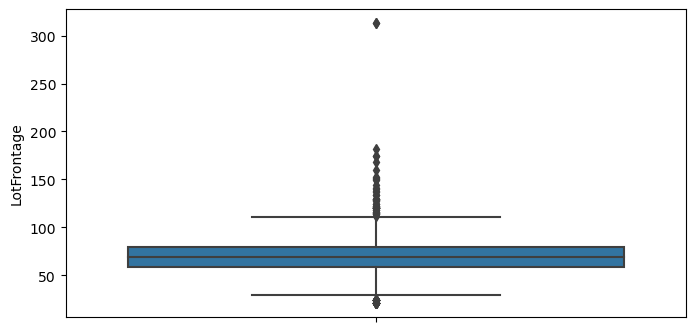

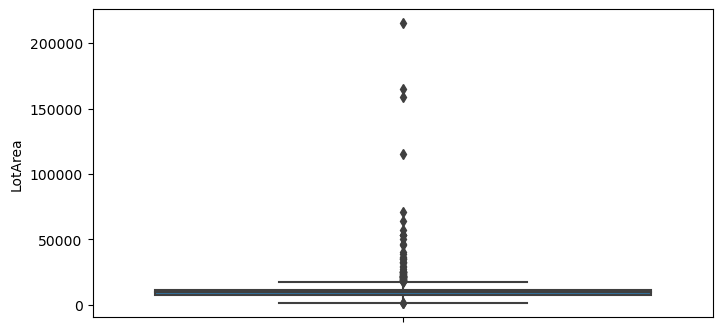

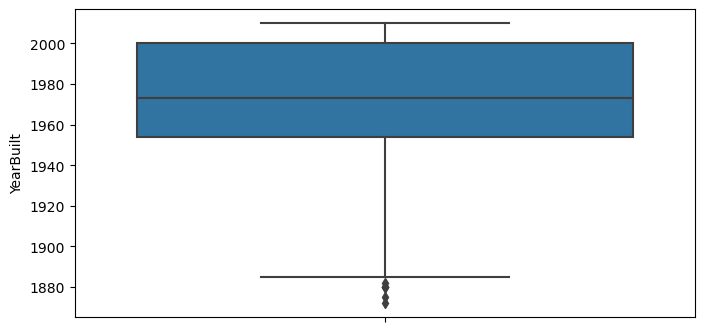

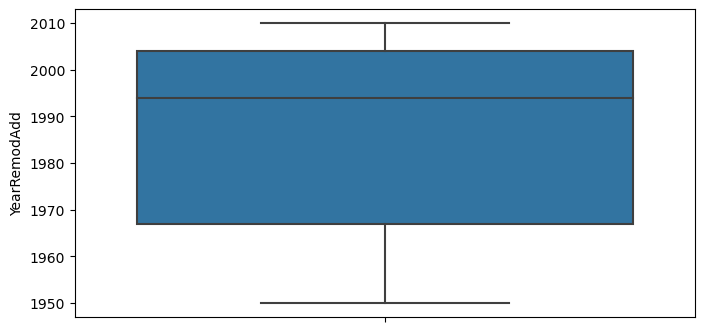

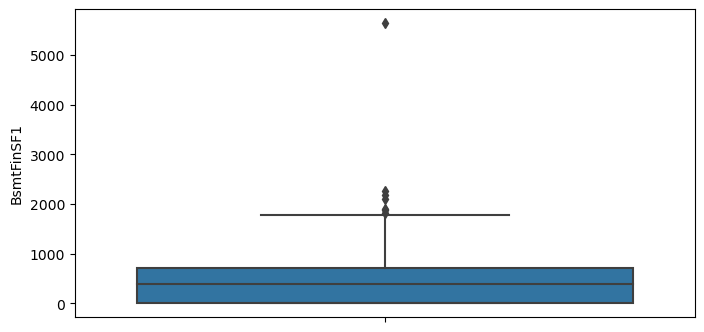

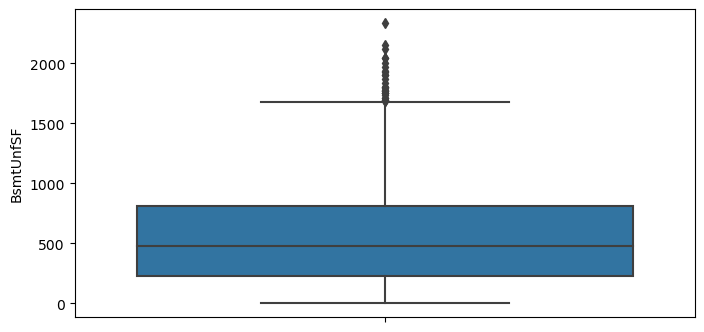

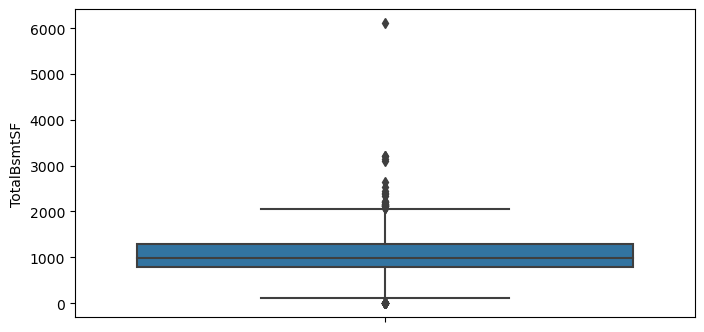

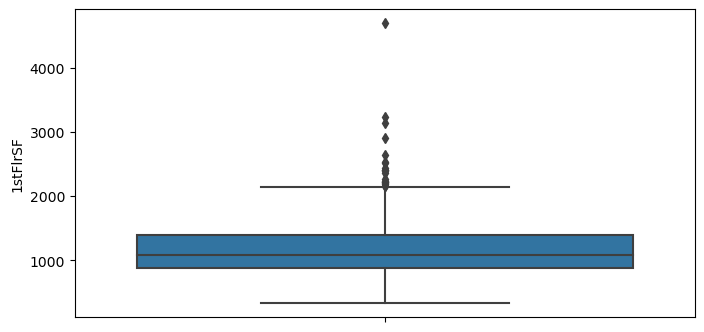

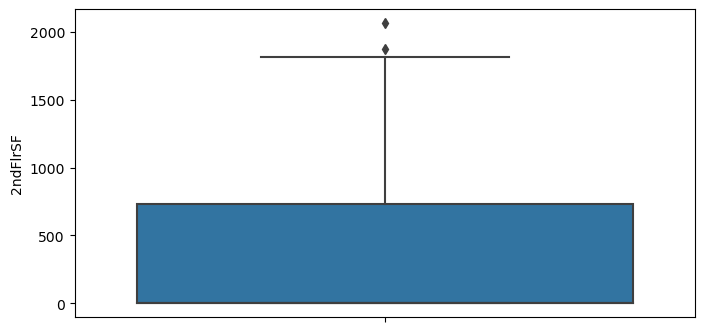

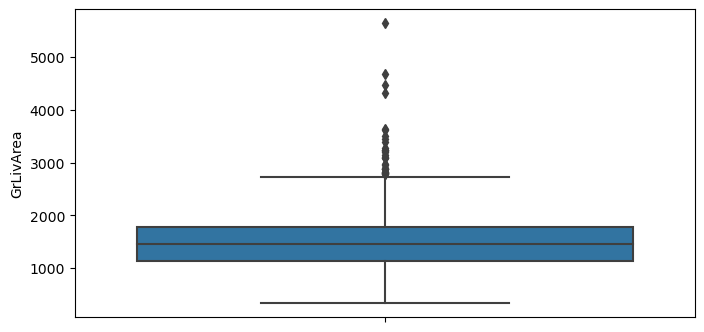

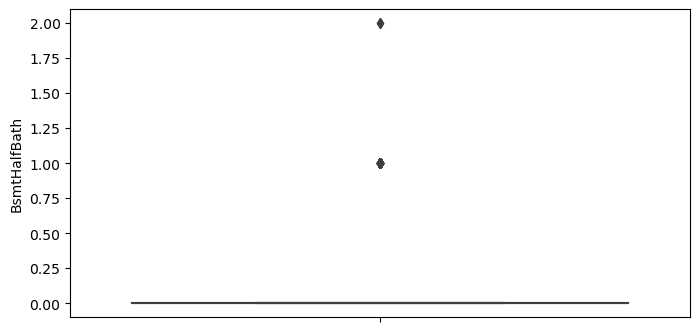

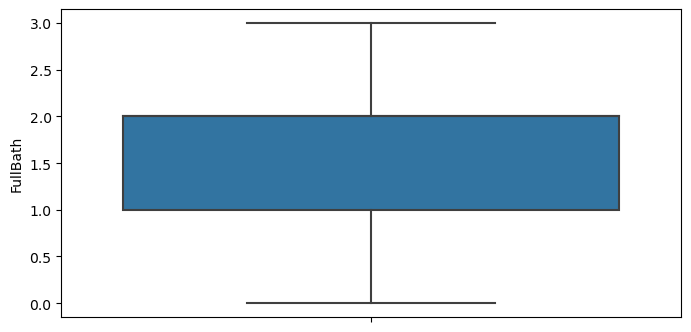

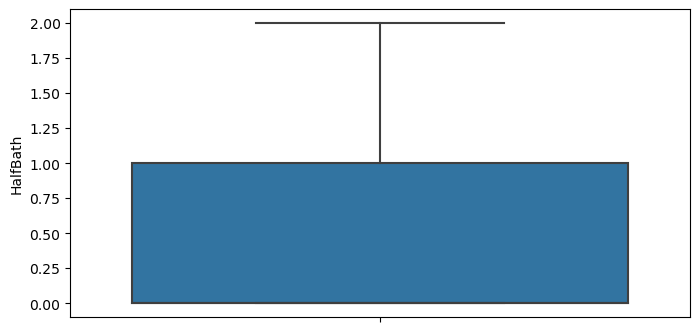

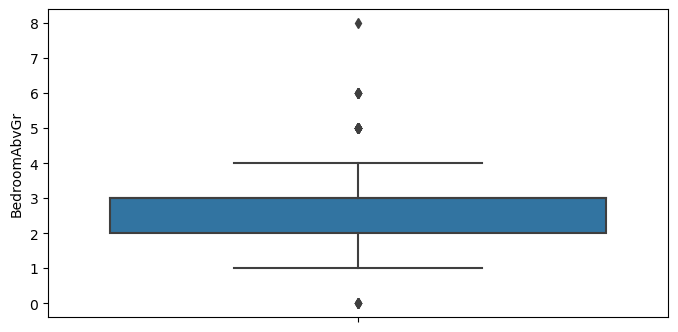

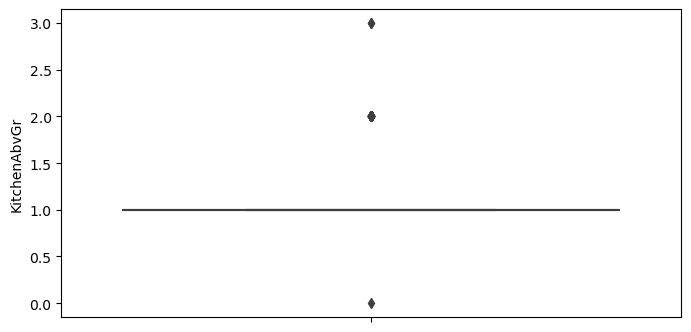

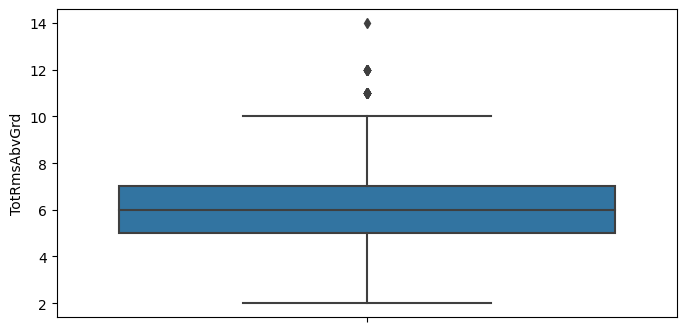

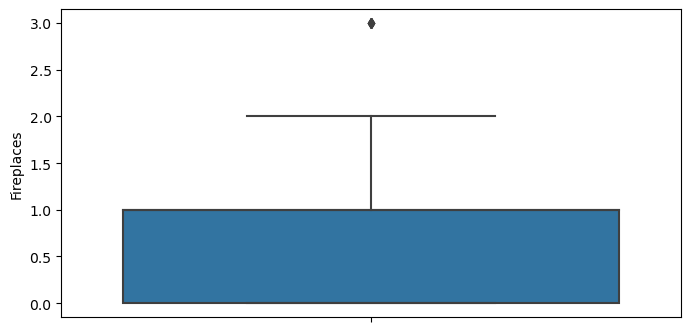

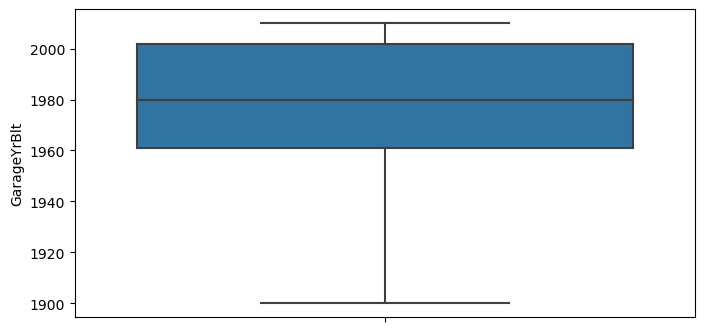

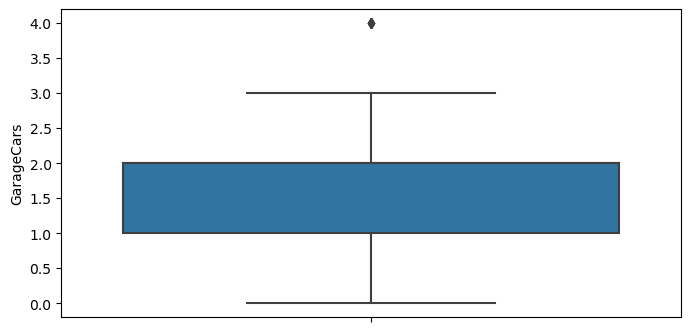

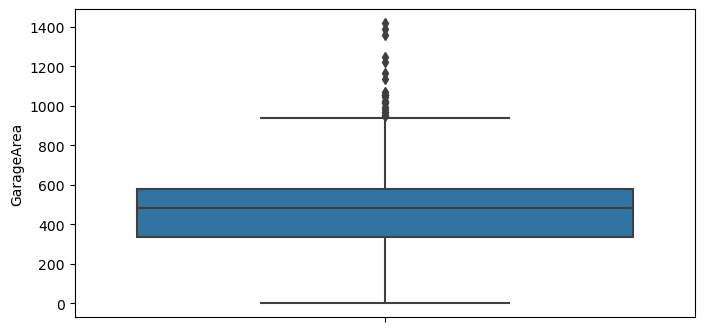

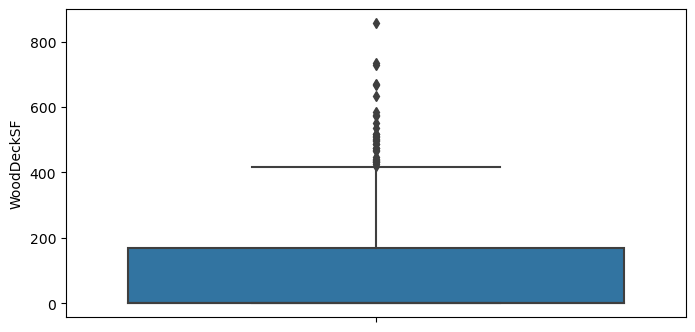

In [150]:
# plotting box chart between numeric columns and output column for outlier detection
for col in numericCols:
    plt.figure(figsize=[8,4])
    sns.boxplot(y=housingDataCleansed[col])
    plt.show()

In [151]:
colsOutliers = ['LotFrontage', 'LotArea', 'GrLivArea']

In [152]:
higherQuartile = housingDataCleansed[colsOutliers].quantile(0.99)
print(higherQuartile)

LotFrontage      141.00
LotArea        37567.64
GrLivArea       3123.48
Name: 0.99, dtype: float64


In [153]:
#Removing data in higher Quartile Range
for col in colsOutliers:
    housingDataCleansed = housingDataCleansed[ (housingDataCleansed[col] < higherQuartile[col])]

In [154]:
housingDataCleansed.shape

(1172, 58)

In [155]:
housingDataCleansed.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,2,548,TA,TA,Y,0,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,RFn,2,460,TA,TA,Y,298,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,RFn,2,608,TA,TA,Y,0,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Unf,3,642,TA,TA,Y,0,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,RFn,3,836,TA,TA,Y,192,WD,Normal,250000


In [156]:
# find the columns which are having some null values
housingDataCleansed.columns[housingDataCleansed.isnull().sum()>0]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [157]:
categoryMissCols=['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']

numericMissCols=['GarageYrBlt']

In [158]:
housingDataCleansed[housingDataCleansed.columns[housingDataCleansed.isnull().sum()>0]].isnull().sum()

MasVnrType       6
BsmtQual        31
BsmtCond        31
BsmtExposure    32
BsmtFinType1    31
BsmtFinType2    32
Electrical       1
GarageType      72
GarageYrBlt     72
GarageFinish    72
GarageQual      72
GarageCond      72
dtype: int64

In [159]:
# imputing the missing values for categorical columns
for col in categoryMissCols:
    housingDataCleansed[col] = housingDataCleansed[col].fillna(housingDataCleansed[col].mode()[0])

In [160]:
for col in numericMissCols:
    housingDataCleansed[col] = housingDataCleansed[col].fillna(housingDataCleansed[col].mean())

## 2. Data Preparation 

In [161]:
# numerical column names are stores in housing_input_data_numeric_columns list
# categorical column names are stores in housing_input_data_categorical_columns list
# list of categorical columns in dataset
housing_input_data_categorical_columns = ['MSSubClass','MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
         'SaleType', 'SaleCondition']
housing_data_categorical = housingDataCleansed[housing_input_data_categorical_columns]
housing_data_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [162]:
# convert into dummies - one hot encoding
housing_input_data_dummies = pd.get_dummies(housing_data_categorical, drop_first=True)
housing_input_data_dummies.head()

,MSSubClass,OverallQual,OverallCond,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,20,6,8,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,60,7,5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,70,7,5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,60,8,5,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [163]:
housingDataCleansed = housingDataCleansed.drop(list(housing_data_categorical.columns), axis=1)

In [164]:
housingDataCleansed = pd.concat([housingDataCleansed, housing_input_data_dummies], axis=1)
housingDataCleansed.shape

(1172, 198)

In [165]:
#Split data into train and test sset
from sklearn.model_selection import train_test_split
housingTrain, housingtest = train_test_split(housingDataCleansed, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### It is important to scale the features for linear regression, ridge regression and lasso regression 

In [166]:
varScaling = ['LotFrontage', 'LotArea',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF','SalePrice']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

housingTrain[varScaling] = scaler.fit_transform(housingTrain[varScaling])

In [167]:
housingtest[varScaling] = scaler.transform(housingtest[varScaling])

In [168]:
# Separate y_train and y_test
Y_train = housingTrain.pop('SalePrice')
X_train = housingTrain

In [169]:
y_test = housingtest.pop('SalePrice')
x_test = housingtest

In [172]:
print(X_train.shape)
print(Y_train.shape)

(820, 197)
(820,)


In [174]:
print(x_test.shape)
print(y_test.shape)

(352, 197)
(352,)


# 3. Model building and Evaluation

## A. Linear Regression 

In [175]:
# Instantiate
linRegModel = LinearRegression()

# Fit a lnear regression model
linRegModel.fit(X_train, Y_train)

LinearRegression()

In [176]:
# Print the coefficients and intercept
print(linRegModel.intercept_)
print(linRegModel.coef_)

-0.20671787738395822
[ 1.21455655e-02  8.01564406e-02  5.82077416e-02  8.85900815e-03
  7.62423057e-02 -1.01035916e-02  1.06350425e-01  1.51820250e-01
  9.93595384e-02  1.30421600e-02 -1.27010583e-02  3.54661646e-02
  1.86114205e-02 -3.96348698e-02 -8.54270132e-02  6.76743403e-02
  1.09681364e-02  1.10398331e-02  4.24875486e-02  9.10193296e-03
  1.27464407e-02  1.04762556e-04  1.03945961e-02  1.02452361e-02
  7.22829051e-02  4.48389711e-02  4.92217302e-02  3.45742447e-02
  1.52520141e-02  7.18738397e-03  4.78222288e-03  1.36075558e-02
 -4.81603046e-02  2.04068027e-03  1.29734463e-02 -2.69660719e-02
 -3.33997757e-02 -1.46520683e-03  2.71707363e-03 -5.29525510e-02
  3.30090121e-02  4.35812015e-02  3.78313670e-02  5.20695001e-03
  3.47692204e-03  4.92854322e-02  3.77911130e-04 -1.23650576e-02
  2.90163152e-02  3.44222788e-02  5.59250018e-04  6.58223044e-03
  4.83010945e-02 -8.22085235e-04  5.72027430e-02  3.91495611e-02
  2.04904450e-02  1.82033355e-02  1.79052968e-02  8.12237388e-03
  9.

In [192]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = linRegModel.predict(X_train)
y_pred_test = linRegModel.predict(x_test)

metric1 = []
r2_train_lr = r2_score(Y_train, y_pred_train)
print(" R sqaure value in train set is ", r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R sqaure value in test set is ",r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - y_pred_train))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, y_pred_train)
print(" Mean Square error in Train",mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(" Mean Square error in Test",mse_test_lr)
metric1.append(mse_test_lr**0.5)

 R sqaure value in train set is  0.9422905854634325
 R sqaure value in test set is  0.9103994375837134
0.8833224964238776
0.4661993744054258
 Mean Square error in Train 0.0010772225566144848
 Mean Square error in Test 0.001324430040924505


### From above observation, the linear regression model give R squared value on train set as 0.942 and R squared value on test set as 0.91 

## B. Ridge Regression 

In [193]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
crossValModel = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
crossValModel.fit(X_train, Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
# Printing the best hyperparameter alpha
print(crossValModel.best_params_)

{'alpha': 3.0}


In [195]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)
print(ridge.coef_)

[ 0.02203084  0.04741345  0.03125573  0.0108577   0.07020384  0.00278694
  0.05767839  0.0798169   0.03883687  0.07682402 -0.01478279  0.03523854
  0.02610074 -0.01145125 -0.0236203   0.04852917  0.01810886  0.00753395
  0.03061307  0.02133903  0.01623833 -0.00019966  0.01490695  0.00946463
  0.0254978   0.00023331  0.01542144  0.00705749  0.01204498  0.00245384
  0.00253361  0.01431674 -0.03071267  0.0047748   0.01842521 -0.02023294
 -0.01816283  0.00044545  0.00144415 -0.02628873 -0.00035209  0.00827023
  0.01134906 -0.01136629 -0.01012899  0.02454459 -0.01475376 -0.02342232
 -0.00373976  0.00013858 -0.0175615  -0.0115531   0.01098202 -0.01819496
  0.04169709  0.02777953 -0.00778067 -0.00637707 -0.00103534 -0.00701164
  0.00160569  0.05874063 -0.02237154  0.00916927  0.0092699   0.01607659
 -0.0005086  -0.00697344 -0.01822806  0.0090621   0.         -0.00308075
 -0.00078714 -0.01962128 -0.01399164 -0.00377281  0.00437395 -0.00092605
 -0.01755864 -0.01184042  0.00658204 -0.00084328  0

In [202]:
#Calculating the Scores

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(x_test)

metric2 = []
r2_train_lr = r2_score(Y_train, y_pred_train)
print(" R sqaure value in train set is ",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R sqaure value in test set is ",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, y_pred_train)
print(" Mean Square error in Train",mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(" Mean Square error in Test",mse_test_lr)
metric2.append(mse_test_lr**0.5)

 R sqaure value in train set is  0.9364234408675748
 R sqaure value in test set is  0.9214649132366747
0.9731272683646668
0.4086247600526558
 Mean Square error in Train 0.001186740571176423
 Mean Square error in Test 0.0011608657956041358


### From above observation, the Ridge regression model give R squared value on train set as 0.9364234408675748 and R squared value on test set as 0.926543295119605 

# B. Lasso Regression 

In [203]:
lasso = Lasso()

# cross validation
crossValModelLasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

crossValModelLasso.fit(X_train, Y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [204]:
print(crossValModelLasso.best_params_)

{'alpha': 0.0001}


In [205]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, Y_train) 
print(lasso.coef_)

[ 0.01163985  0.05792463  0.05167058  0.00898837  0.07717438 -0.
  0.06136328  0.1098032   0.04583222  0.08225793 -0.00893623  0.02552767
  0.021969   -0.01263189 -0.03103998  0.04081107  0.01379836  0.00690646
  0.03543454  0.00469719  0.01112826 -0.00019532  0.01354665  0.01038034
  0.02203691 -0.          0.00841188  0.          0.0027246  -0.
  0.00176209  0.01187304 -0.0296386   0.00390905  0.01651933 -0.01627641
 -0.00826407 -0.         -0.         -0.03204089  0.          0.
  0.0161552  -0.         -0.          0.02876673 -0.00822535 -0.01546144
  0.          0.         -0.01289869 -0.00562676  0.00206092 -0.00967803
  0.05259095  0.0345336  -0.         -0.          0.00079748 -0.
  0.00680277  0.07296968 -0.01252576  0.00574315  0.00685439  0.0132484
  0.         -0.         -0.0123477   0.0024545   0.         -0.
  0.         -0.02118879 -0.00512424 -0.          0.         -0.00263994
 -0.00572667 -0.00372409  0.0087048   0.          0.         -0.
  0.          0.00181573  0

In [206]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(x_test)

metric3 = []
r2_train_lr = r2_score(Y_train, y_pred_train)
print(" R sqaure value in train set is ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(" R sqaure value in test set is ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(Y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(Y_train, y_pred_train)
print(" Mean Square error in Train",mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(" Mean Square error in Test",mse_test_lr)
metric3.append(mse_test_lr**0.5)

 R sqaure value in train set is  0.9346661804641629
 R sqaure value in test set is  0.926543295119605
1.0000245720173493
0.3822015056336232
 Mean Square error in Train 0.0012195421609967675
 Mean Square error in Test 0.0010857997319137023


### From above observation, the Lasso regression model give R squared value on train set as 0.9346661804641629 and R squared value on test set as 0.926543295119605 

### Conclusion - 

### In this evaluation, Ridge is giving better R2 score than linear regrerssion model and Lasso is giving better R2 score than the Ridge regression Model

## C. Finalizing Metrics 

In [207]:
print(metric1) # For Linear Regression
print(metric2) # Ridge Regression
print(metric3) # Lasso Regression

[0.9422905854634325, 0.9103994375837134, 0.8833224964238776, 0.4661993744054258, 0.0328210687914712, 0.03639271961429243]
[0.9364234408675748, 0.9214649132366747, 0.9731272683646668, 0.4086247600526558, 0.03444910116645169, 0.034071480678187965]
[0.9346661804641629, 0.926543295119605, 1.0000245720173493, 0.3822015056336232, 0.03492194383187693, 0.032951475413305883]


In [208]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.942291,0.936423,0.934666
1,R2 Score (Test),0.910399,0.921465,0.926543
2,RSS (Train),0.883322,0.973127,1.000025
3,RSS (Test),0.466199,0.408625,0.382202
4,MSE (Train),0.032821,0.034449,0.034922
5,MSE (Test),0.036393,0.034071,0.032951


#### coefficients - 

In [216]:
data = housingDataCleansed

print(linRegModel.coef_)
print(ridge.coef_)
print(lasso.coef_)


[ 1.21455655e-02  8.01564406e-02  5.82077416e-02  8.85900815e-03
  7.62423057e-02 -1.01035916e-02  1.06350425e-01  1.51820250e-01
  9.93595384e-02  1.30421600e-02 -1.27010583e-02  3.54661646e-02
  1.86114205e-02 -3.96348698e-02 -8.54270132e-02  6.76743403e-02
  1.09681364e-02  1.10398331e-02  4.24875486e-02  9.10193296e-03
  1.27464407e-02  1.04762556e-04  1.03945961e-02  1.02452361e-02
  7.22829051e-02  4.48389711e-02  4.92217302e-02  3.45742447e-02
  1.52520141e-02  7.18738397e-03  4.78222288e-03  1.36075558e-02
 -4.81603046e-02  2.04068027e-03  1.29734463e-02 -2.69660719e-02
 -3.33997757e-02 -1.46520683e-03  2.71707363e-03 -5.29525510e-02
  3.30090121e-02  4.35812015e-02  3.78313670e-02  5.20695001e-03
  3.47692204e-03  4.92854322e-02  3.77911130e-04 -1.23650576e-02
  2.90163152e-02  3.44222788e-02  5.59250018e-04  6.58223044e-03
  4.83010945e-02 -8.22085235e-04  5.72027430e-02  3.91495611e-02
  2.04904450e-02  1.82033355e-02  1.79052968e-02  8.12237388e-03
  9.18211002e-03  9.34687